# Разведочный анализ данных. Исследование и визуализация данных.
## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных для распознавания вин - https://scikit-learn.org/stable/datasets/toy_dataset.html

Эта задача является очень актуальной для продавцов вина, которым необходимо найти нужное вино.

Количество экземпляров: 178

Сорта:
```
• class_0 (59)
• class_1 (71)
• class_2 (48)
```


Информация об атрибутах:
```
• Alcohol - алкоголь
• Malic acid - яблочная кислота
• Ash - пепел
• Alcalinity of ash - щелочность пепла
• Magnesium - магний
• Total phenols - всего фенолов
• Flavanoids - флавоноиды
• Nonflavanoid phenols - нефлаваноидные фенолы
• Proanthocyanins - проантоцианы
• Color intensity - интенсивность цвета
• Hue - оттенок
• OD280/OD315 of diluted wines - OD280/OD315 разбавленных вин
• Proline - пролин
```

## Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [1]:
!pip install numpy
import numpy as np
!pip install pandas
import pandas as pd
!pip install sklearn
from sklearn.datasets import *
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

## Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas и Sklearn.

Нужный нам датасет можно загрузить с помощью команды: 

In [2]:
wine = load_wine()
type(wine)

sklearn.utils.Bunch

Преобразование датасета Scikit-learn в Pandas Dataframe:

In [3]:
data1 = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

## 2) Основные характеристики датасета

Датасет возвращается в виде словаря с ключами, которые можно получить, выполнив следующую команду:

In [4]:
for x in wine:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [5]:
# Название сортов:
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [6]:
# Список колонок с типами данных
data1.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [7]:
# Размерность данных
print(wine['data'].shape)

(178, 13)


In [8]:
# Размерность целевого признака
print(wine['target'].shape)

(178,)


In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data1[data1[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


In [10]:
# Основные статистические характеристки набора данных
data1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

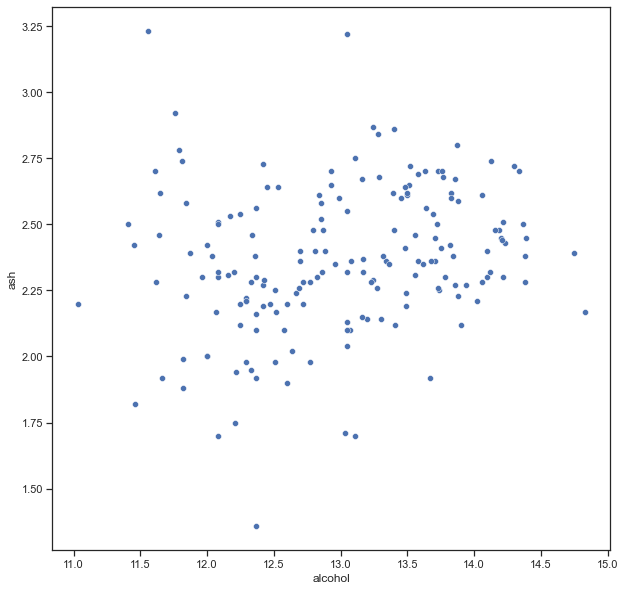

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='ash', data=data1)

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

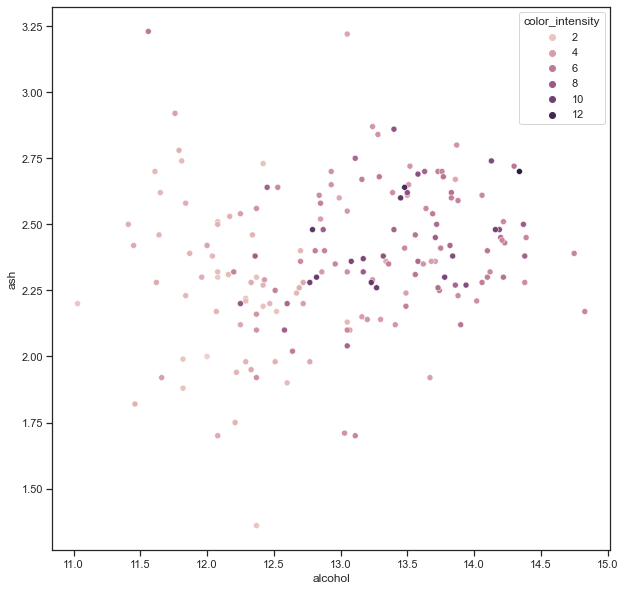

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='ash', data=data1, hue='color_intensity')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

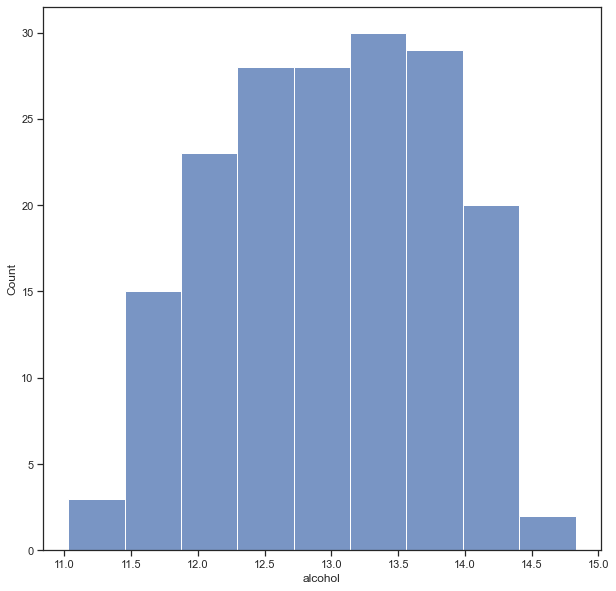

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data1['alcohol'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

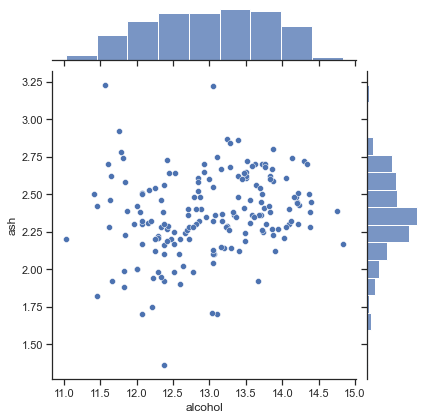

In [14]:
sns.jointplot(x='alcohol', y='ash', data=data1)

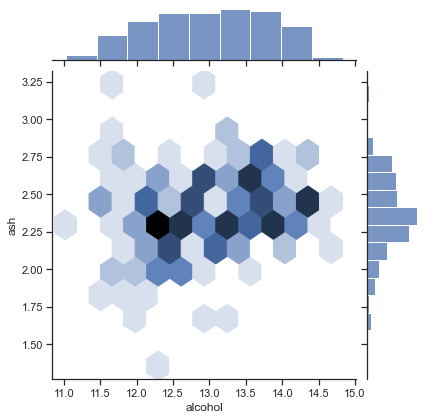

In [15]:
sns.jointplot(x='alcohol', y='ash', data=data1, kind="hex")

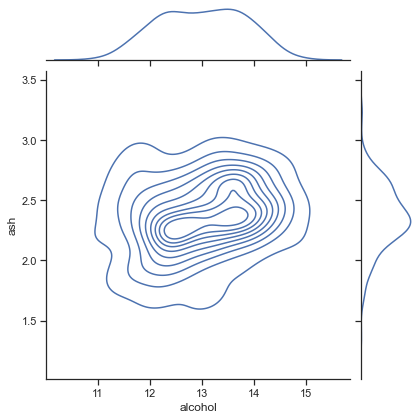

In [16]:
sns.jointplot(x='alcohol', y='ash', data=data1, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

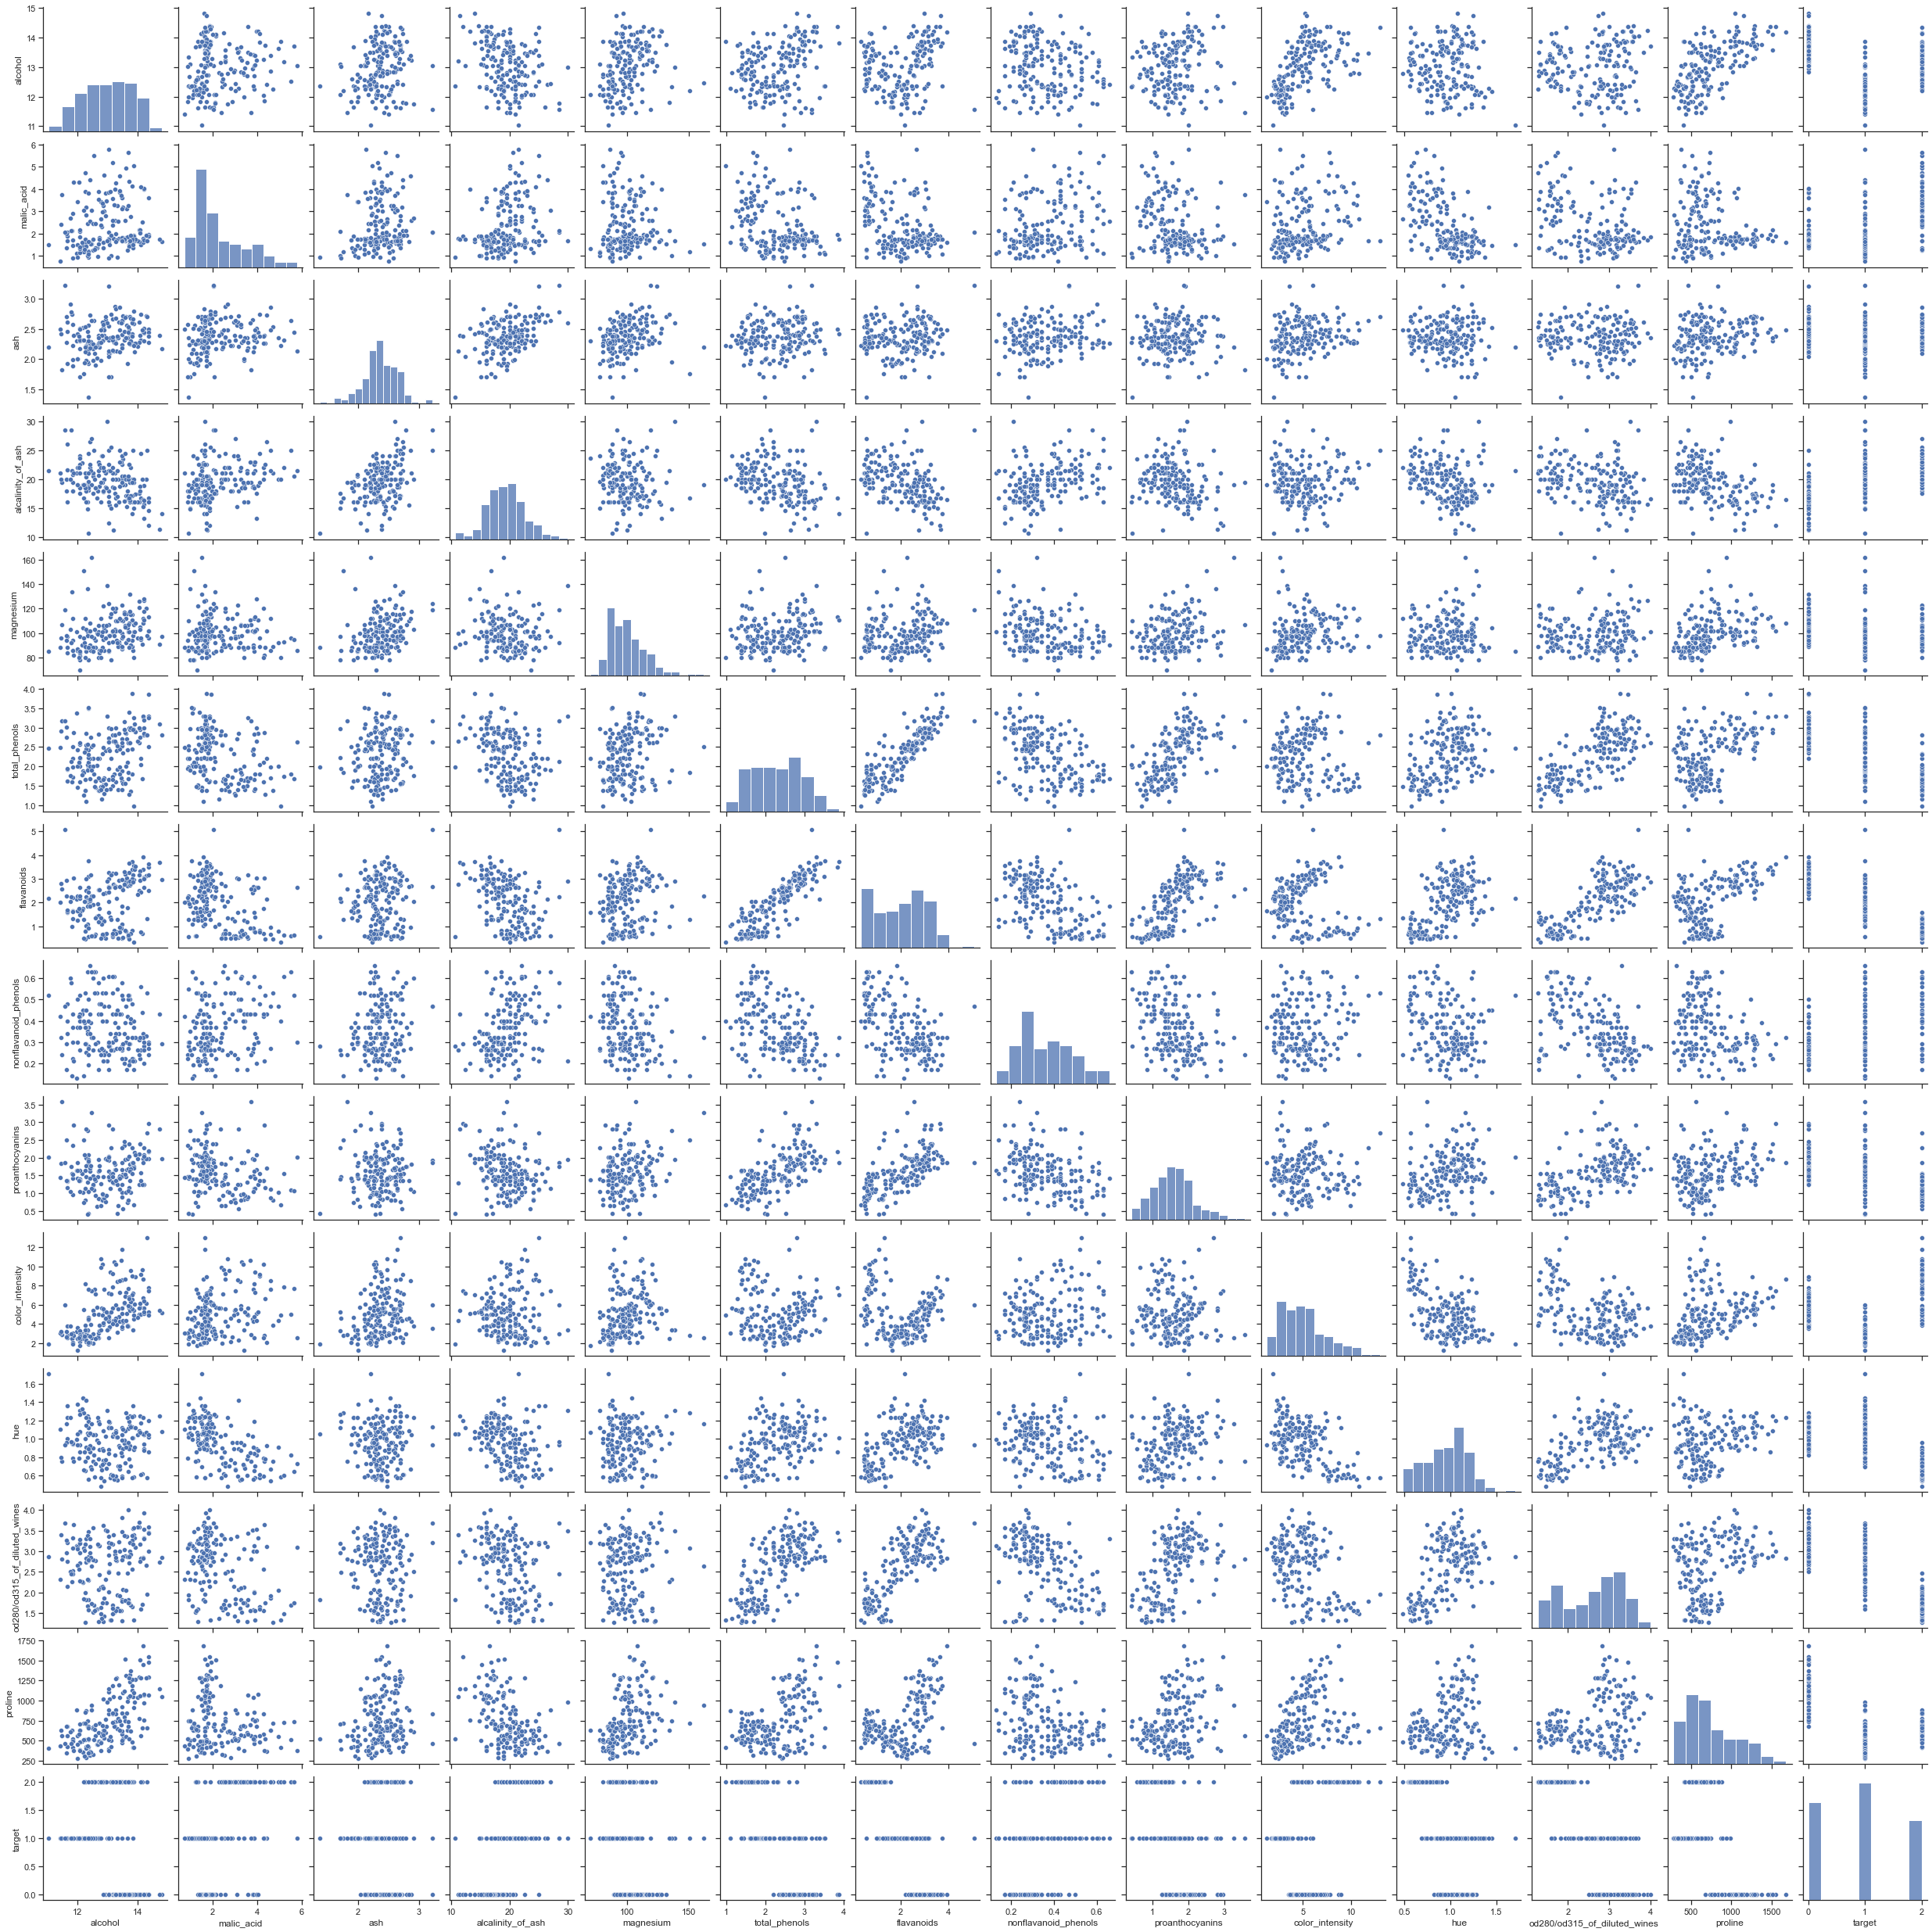

In [17]:
sns.pairplot(data1)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

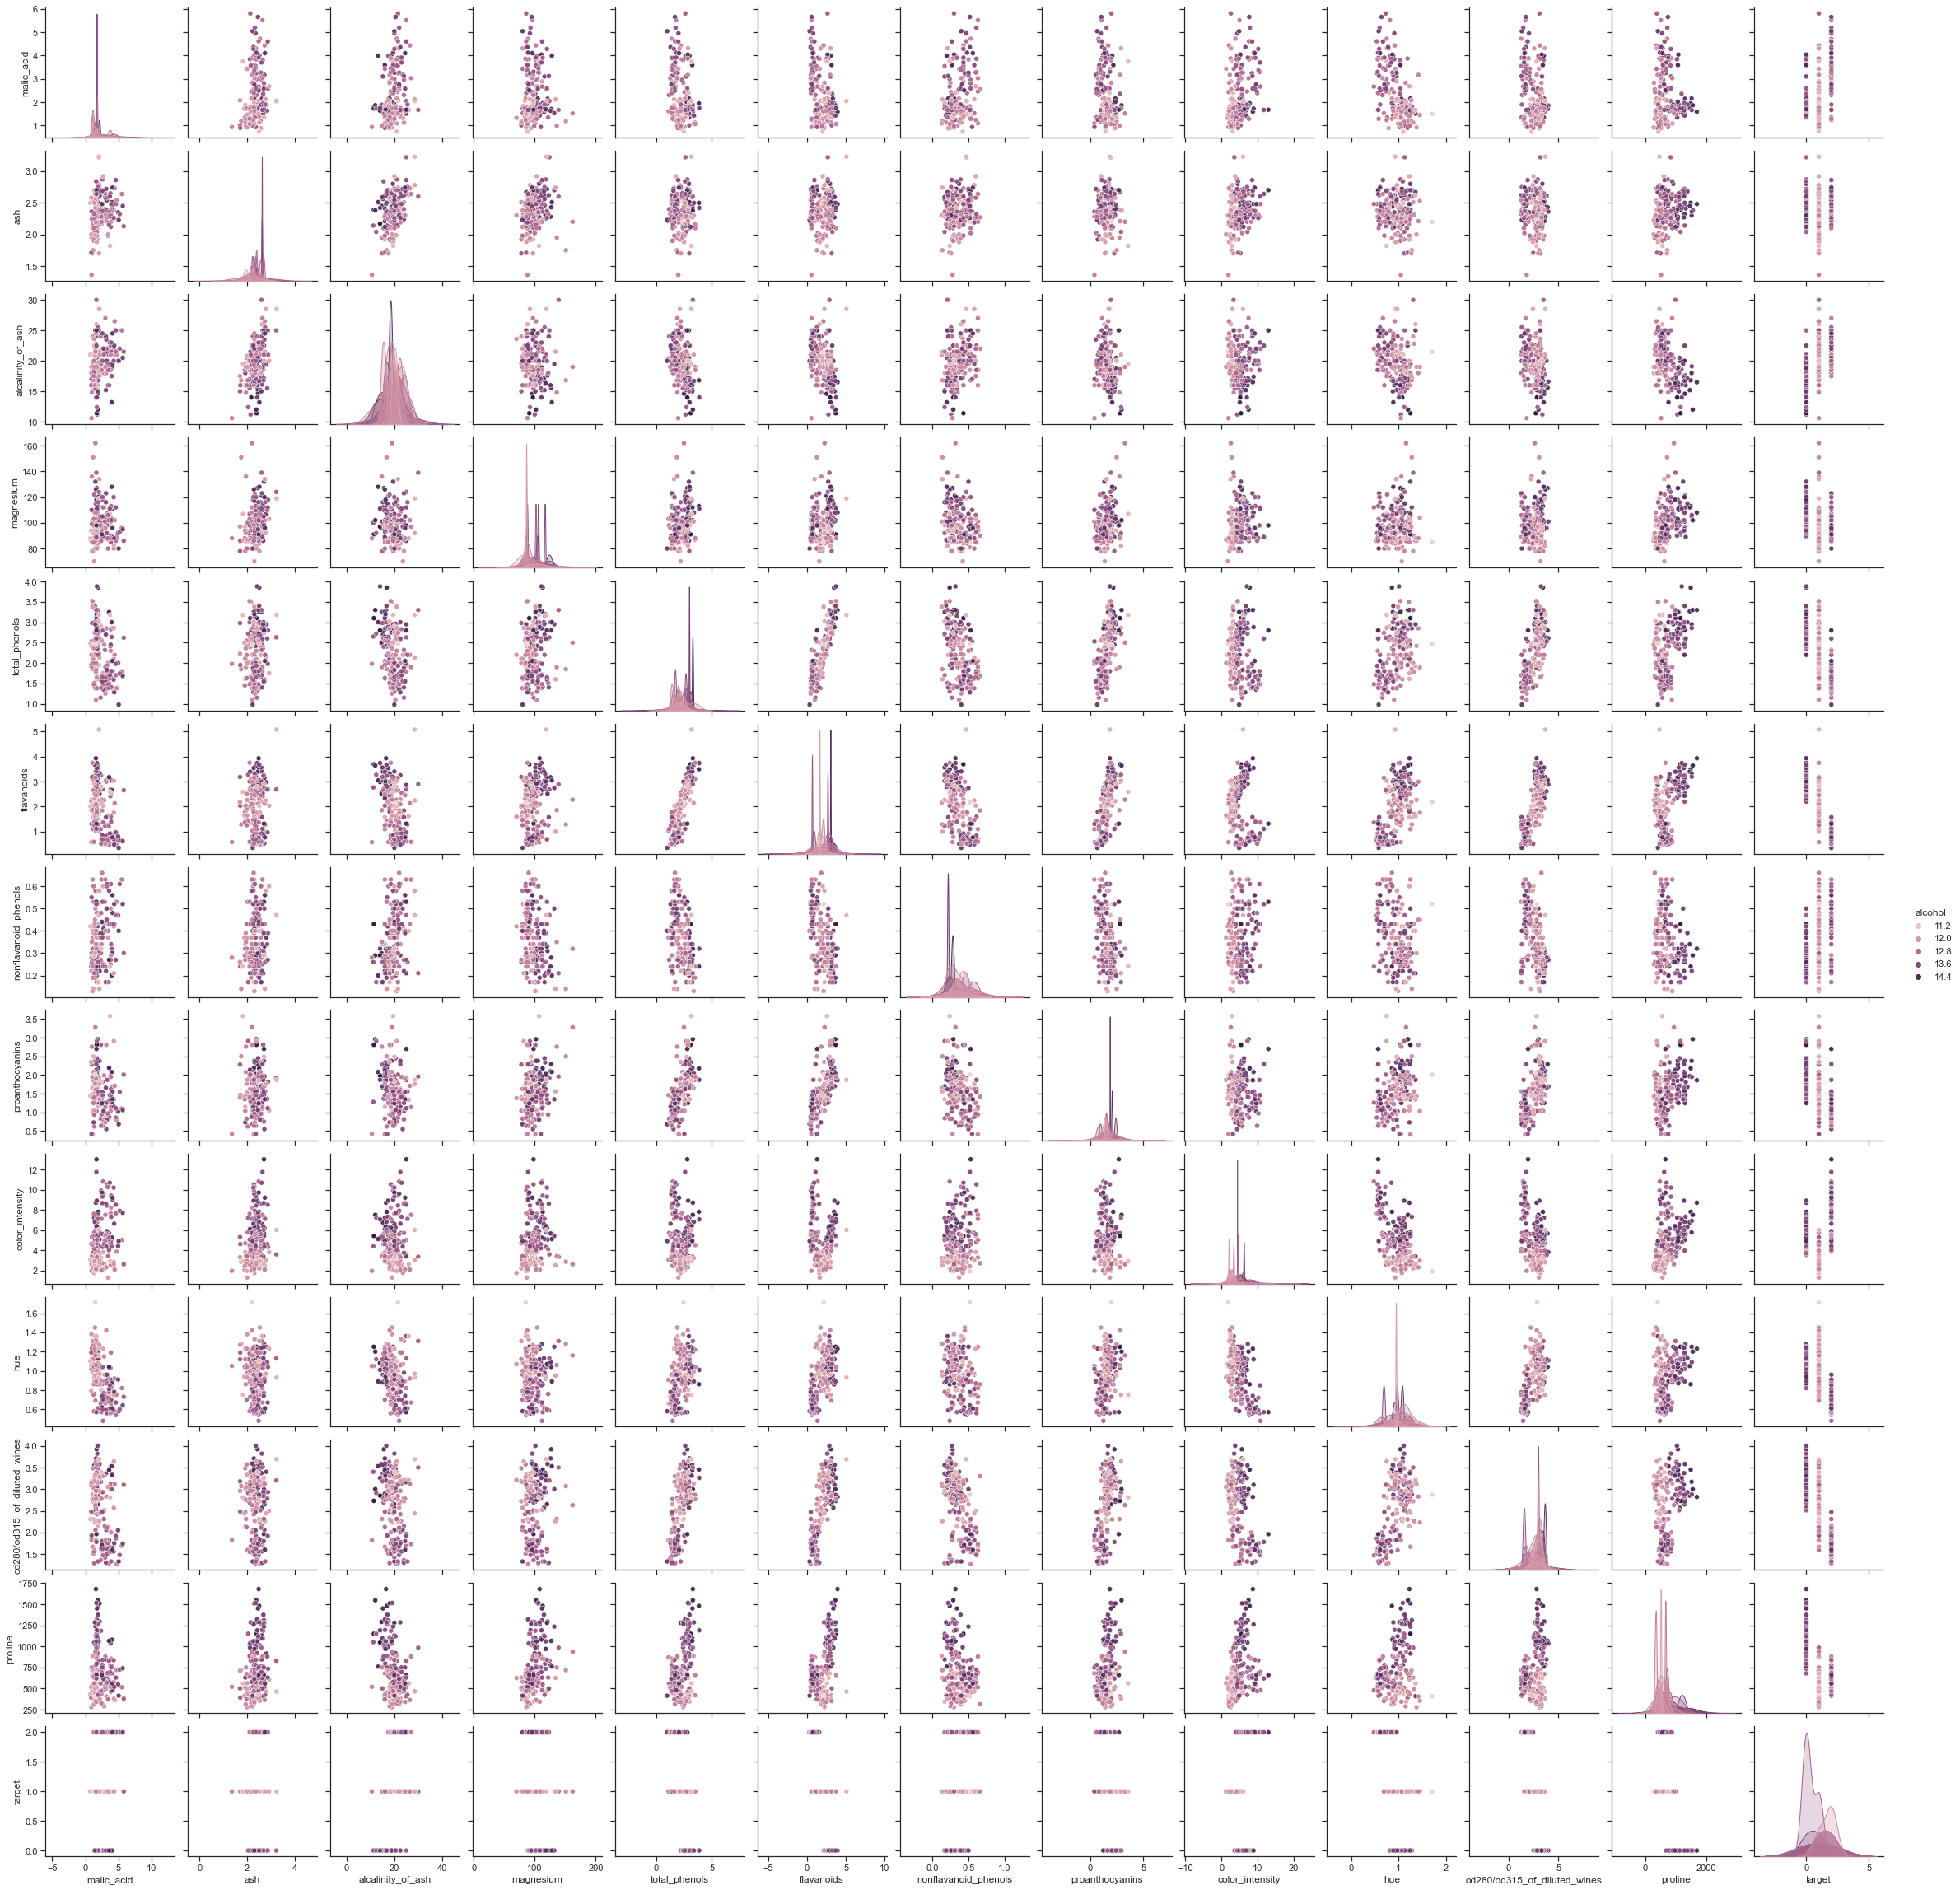

In [18]:
sns.pairplot(data1, hue="alcohol")

### Ящик с усами
Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='alcohol'>

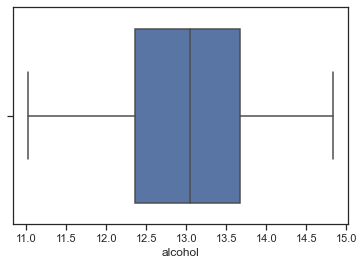

In [19]:
sns.boxplot(x=data1['alcohol'])

<AxesSubplot:ylabel='alcohol'>

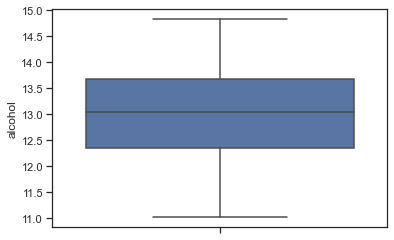

In [20]:
# По вертикали
sns.boxplot(y=data1['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

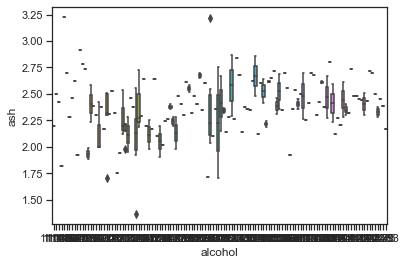

In [21]:
# Распределение параметра alcohol сгруппированные по ash.
sns.boxplot(x='alcohol', y='ash', data=data1)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<AxesSubplot:xlabel='alcohol'>

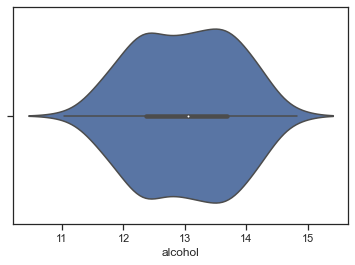

In [22]:
sns.violinplot(x=data1['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

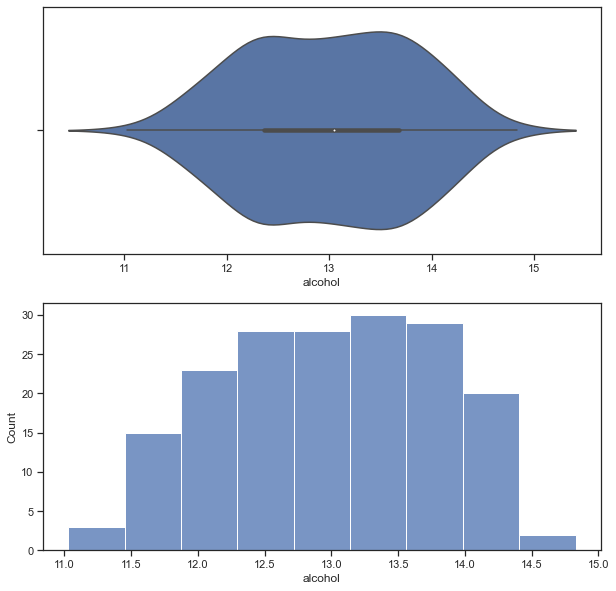

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['alcohol'])
sns.histplot(data1['alcohol'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

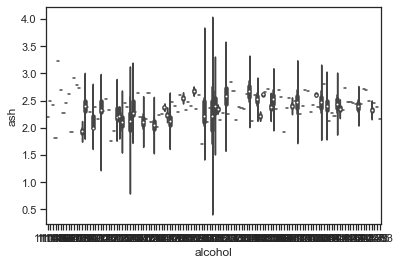

In [24]:
# Распределение параметра alcohol сгруппированные по ash.
sns.violinplot(x='alcohol', y='ash', data=data1)

In [ ]:
sns.catplot(y='alcohol', x='ash', data=data1, kind="violin", split=True)

## 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "alcohol"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [ ]:
data1.corr()

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [ ]:
data1.corr(method='pearson')

In [ ]:
data1.corr(method='kendall')

In [ ]:
data1.corr(method='spearman')

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
sns.heatmap(data1.corr())

In [ ]:
# Вывод значений в ячейках
sns.heatmap(data1.corr(), annot=True, fmt='.3f')

In [ ]:
# Изменение цветовой гаммы
sns.heatmap(data1.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

In [ ]:
# Треугольный вариант матрицы
mask = np.zeros_like(data1.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data1.corr(), mask=mask, annot=True, fmt='.3f')

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')